In [3]:
# Add your file path
datContent = [i.strip().split() for i in open("hollins.dat").readlines()]

In [4]:
site_id={}
page_dict = {}
# create site id dict
for l in datContent[1:]:
  if not l[1].isdigit():
    if int(l[0]) not in site_id:
        site_id[int(l[0])] = l[1]
        page_dict[int(l[0])]=[]
    else:
        site_id[int(l[0])].append(1[1])
        

In [5]:
print(site_id)

{1: 'http://www1.hollins.edu/', 2: 'http://www.hollins.edu/', 3: 'http://www1.hollins.edu/Docs/CompTech/Network/webmail_faq.htm', 4: 'http://www1.hollins.edu/Docs/Forms/GetForms.htm', 5: 'http://www1.hollins.edu/Docs/misc/travel.htm', 6: 'http://www1.hollins.edu/Docs/GVCalendar/gvmain.htm', 7: 'http://www1.hollins.edu/docs/events/events.htm', 8: 'http://www1.hollins.edu/docs/comptech/mainviruses.htm', 9: 'http://www1.hollins.edu/Docs/Academics/acad.htm', 10: 'http://www1.hollins.edu/Docs/CompTech/Blackboard/bb_faq.htm', 11: 'http://www1.hollins.edu/Docs/comptech/comptech.htm', 12: 'http://www1.hollins.edu/Docs/Academics/international_programs/index.htm', 13: 'http://www1.hollins.edu/Docs/academics/online/cyber.htm', 14: 'http://www1.hollins.edu/Registrar/registrar.htm', 15: 'http://www1.hollins.edu/Docs/Academics/writingcenter/wcenter.htm', 16: 'http://www.hollins.edu/about/map/map.htm', 17: 'http://www1.hollins.edu/Docs/SchoolServices/FoodServ/default.htm', 18: 'http://www1.hollins.ed

In [6]:
# create dict for graph
# Like 1->2,3
for link in datContent[1:]:
  if link[1].isdigit():
    if int(link[1]) not in page_dict:
        page_dict[int(link[0])] = [int(link[1])]
    else:
        page_dict[int(link[0])].append(int(link[1]))

In [7]:
print(len(page_dict[2]))

25


In [8]:
def page_rank_iterative(di_graph_dict,no_of_ite,damping_factor=0.85):
    L1=[]
  # Creare the link from dict
    for k in di_graph_dict:
        L1.append([[k],di_graph_dict[k]])
        pre_rank = {}
        c_rank={}
  # Initialize
    for k in range(0,len(L1)):
        pre_rank[k]=(1/len(L1))
        c_rank[k]=0
    for edge in L1[k][1]:
        pre_rank[edge]=(1/len(L1))
        c_rank[edge]=0
  # no_of_ite=3

    for _ in range(0,no_of_ite):
        for k in range(0,len(L1)):
            for x in L1[k][1]:
                c_rank[x]=c_rank[x]+(pre_rank[k]/len(L1[k][1]))
            for x in c_rank:
                c_rank[x]=(1-damping_factor)+damping_factor*c_rank[x]
                pre_rank=c_rank.copy()
            for k in range(0,len(L1)):
                  c_rank[L1[k][0][0]]=0

    return pre_rank

In [ ]:
no_of_iteration=10
damping_factor=0.25
c_rank=page_rank_iterative(page_dict,no_of_iteration,damping_factor)

In [19]:
# combine site name with rank
d = {}
for k in site_id.keys():
  d[k] = (k,c_rank[k], site_id[k])

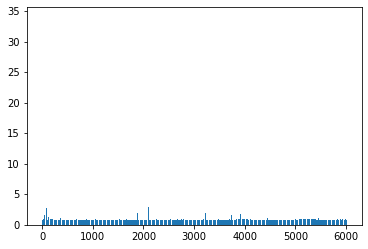

In [20]:
import matplotlib.pyplot as plt
# plt.plot(c_rank.keys(),c_rank.items())
plt.bar(*zip(*sorted(c_rank.items())))
plt.axis(ymin = 0)
plt.show()

In [21]:
print(d)

{1: (1, 0.75, 'http://www1.hollins.edu/'), 2: (2, 33.90268865019933, 'http://www.hollins.edu/'), 3: (3, 0.93693173247654, 'http://www1.hollins.edu/Docs/CompTech/Network/webmail_faq.htm'), 4: (4, 0.7604166269302368, 'http://www1.hollins.edu/Docs/Forms/GetForms.htm'), 5: (5, 0.7604166269302368, 'http://www1.hollins.edu/Docs/misc/travel.htm'), 6: (6, 0.7604166269302368, 'http://www1.hollins.edu/Docs/GVCalendar/gvmain.htm'), 7: (7, 2.9757067452199633, 'http://www1.hollins.edu/docs/events/events.htm'), 8: (8, 0.8212940122664854, 'http://www1.hollins.edu/docs/comptech/mainviruses.htm'), 9: (9, 0.7995267105511487, 'http://www1.hollins.edu/Docs/Academics/acad.htm'), 10: (10, 1.506269929132378, 'http://www1.hollins.edu/Docs/CompTech/Blackboard/bb_faq.htm'), 11: (11, 0.7604166269302368, 'http://www1.hollins.edu/Docs/comptech/comptech.htm'), 12: (12, 0.876130402796951, 'http://www1.hollins.edu/Docs/Academics/international_programs/index.htm'), 13: (13, 0.7679887369484081, 'http://www1.hollins.edu

In [22]:
import pandas as pd
D_ans=pd.DataFrame.from_dict(d, orient='index',columns=['ID','Rank','Link'])

In [23]:
D_ans

,ID,Rank,Link
1,1,0.750000,http://www1.hollins.edu/
2,2,33.902689,http://www.hollins.edu/
3,3,0.936932,http://www1.hollins.edu/Docs/CompTech/Network/...
4,4,0.760417,http://www1.hollins.edu/Docs/Forms/GetForms.htm
5,5,0.760417,http://www1.hollins.edu/Docs/misc/travel.htm
...,...,...,...
6008,6008,0.779417,http://www1.hollins.edu/classes/comm250/valent...
6009,6009,0.779417,http://www1.hollins.edu/classes/comm250/valent...
6010,6010,0.779417,http://www1.hollins.edu/classes/comm250/valent...
6011,6011,0.779417,http://www1.hollins.edu/classes/comm250/valent...


In [24]:
D_ans_1 = D_ans.sort_values(by ='Rank' , ascending=False)

In [25]:
D_ans_1

,ID,Rank,Link
2,2,33.902689,http://www.hollins.edu/
425,425,11.945405,http://www.hollins.edu/academics/library/resou...
37,37,7.723734,http://www.hollins.edu/admissions/visit/visit.htm
38,38,7.424324,http://www.hollins.edu/about/about_tour.htm
52,52,7.145951,http://www.hollins.edu/admissions/info-request...
...,...,...,...
2016,2016,0.751112,http://www1.hollins.edu/Docs/GVCalendar/GVArch...
2015,2015,0.751112,http://www1.hollins.edu/Docs/GVCalendar/GVArch...
2014,2014,0.751112,http://www1.hollins.edu/Docs/GVCalendar/GVArch...
51,51,0.750000,http://www.hollins.edu/academics/library/libto...


In [14]:
D_ans_1.to_csv('out1.txt', index=False)